In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

palette = ["#ffb4bfff","#fbfbaaff","#ffc7f0ff","#d2ffbeff","#ffd380ff","#b9cdffff"]

In [2]:
train_df = pd.read_csv('../data/trian_cleaned.csv')
bkk_zone_df = pd.read_csv('../data/bkk_zone.csv')

In [41]:
# Filtering only Condo in Bangkok
condo_df = train_df[(train_df['property_type'] == 'Condo') & (train_df['province'] == 'Bangkok')]
# Rename column from district to district_en 
condo_df = condo_df.rename(columns={"district": "district_en"})
# Merge condo data with bkk zone
condo_df = pd.merge(left=condo_df,right=bkk_zone_df)

In [79]:
condo_df.columns

Index(['id', 'province', 'district_en', 'subdistrict', 'address',
       'property_type', 'total_units', 'bedrooms', 'baths', 'floor_area',
       'floor_level', 'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities', 'price',
       'price_sqm', 'zone_name'],
      dtype='object')

In [43]:
# Remove Duplicate by assuming that the same condo have the same 'latitude' and 'longitude'
condo_drop_duplicate_address = condo_df.drop_duplicates(subset=['latitude', 'longitude'], keep='first')
condo_drop_duplicate_address_zone = condo_drop_duplicate_address.groupby('zone_name')['id'].count().reset_index()
condo_drop_duplicate_address_zone

,zone_name,id
0,Zone 1,97
1,Zone 2,692
2,Zone 3,253
3,Zone 4,14
4,Zone 5,33
5,Zone 6,30


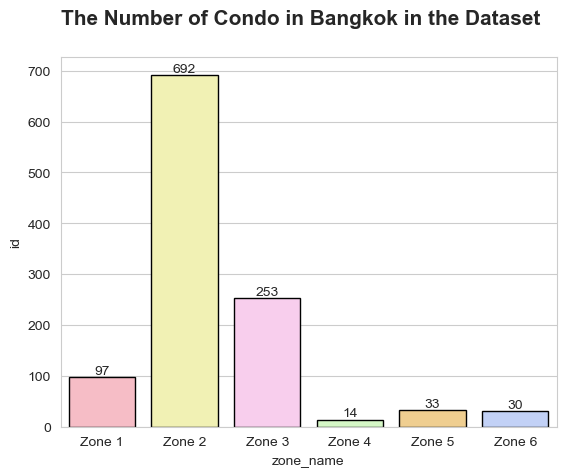

In [75]:
# Visualize The number of Condo in Bangkok in the Dataset
ax = sns.barplot(x = 'zone_name', y = 'id', data = condo_drop_duplicate_address_zone,palette=palette, hue = 'zone_name',edgecolor='black');
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
plt.suptitle('The Number of Condo in Bangkok in the Dataset', fontsize=15, fontweight="bold")
plt.savefig('The Number of Condo in Bangkok in the Dataset.png')

In [91]:
# Remove Duplicate by assuming that the same condo have the same 'latitude' and 'longitude'


,zone_name,total_units
0,Zone 1,630.65
1,Zone 2,441.98
2,Zone 3,613.98
3,Zone 4,902.79
4,Zone 5,870.21
5,Zone 6,729.90


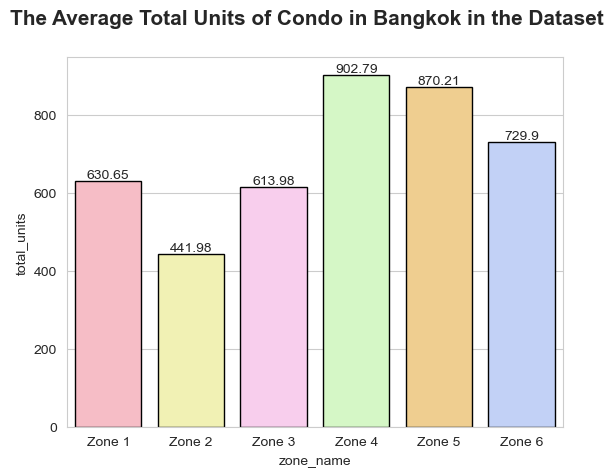

In [97]:
# Visualize The Average Total Units of Condo in Bangkok in the Dataset
ax = sns.barplot(x = 'zone_name', y = 'total_units', data = condo_drop_duplicate_address.groupby('zone_name')['total_units'].mean().round(2).reset_index(),palette=palette, hue = 'zone_name',edgecolor='black');
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
plt.suptitle('The Average Total Units of Condo in Bangkok in the Dataset', fontsize=15, fontweight="bold")
plt.savefig('The Average Total Units of Condo in Bangkok in the Dataset.png')